# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [67]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

400 observations
Three of these observations contain missing data (NaN) as shown in the cell below)

In [4]:
#print "Unique entries for 'admit':\n", df_raw['admit'].unique(), "\n\n"
#print "Unique entries for 'gre':\n", df_raw['gre'].unique(), "\n\n"
#print "Unique entries for 'gpa':\n", df_raw['gpa'].unique(), "\n\n"
#print "Unique entries for 'prestige':\n", df_raw['prestige'].unique(), "\n\n"
df_raw[df_raw.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


#### Question 2. Create a summary table

In [5]:
#function

In [6]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


#### Question 3. Why would GRE have a larger STD than GPA?

Answer:

Both are continuous, but GRE has a much larger range of scoring (200 - 800) compared to GPA (0.0 - 4.0) so there is a greater (possible) dispersion of data points, leading to larger differences from the mean, leading to a higher STD value.

#### Question 4. Drop data points with missing data


In [31]:
# Drop any rows with null values:
df_clean = df_raw.dropna(axis=0)

# Counts should verify the three rows (shown above) reduce the count from 400 to 397
print df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

You can compare the count of the number of rows in the new dataframe to the old one, and verify it is less by the the count of the null rows previously identified.

See the code below to visually verify the dropped data rows...

In [8]:
if ~df_clean.equals(df_raw):
    print "\n%d / %d null rows in df_raw:" % (len(df_raw[df_raw.isnull().any(axis=1)].index), len(df_raw.index))
    print df_raw[df_raw.isnull().any(axis=1)]
    
    print "\n%d / %d null rows in df_clean:" % (len(df_clean[df_clean.isnull().any(axis=1)].index), len(df_clean.index))
    print df_clean[df_clean.isnull().any(axis=1)]


3 / 400 null rows in df_raw:
     admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN

0 / 397 null rows in df_clean:
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x1c18a12e10>],
 'caps': [<matplotlib.lines.Line2D at 0x1c18a1f650>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c18a2a1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c18a1fdd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1c18a12ed0>,
  <matplotlib.lines.Line2D at 0x1c18a1f290>]}

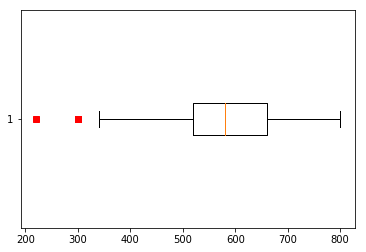

In [56]:
#boxplot 1 GRE

#df_clean.gre.plot(kind = 'box', figsize = (8, 4))
plt.figure()
plt.boxplot(df_clean.gre, 0, 'rs', 0, meanline=True)

{'boxes': [<matplotlib.lines.Line2D at 0x1c1893e250>],
 'caps': [<matplotlib.lines.Line2D at 0x1c1893ea50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c1894c5d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c1894c210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1c1893e310>,
  <matplotlib.lines.Line2D at 0x1c1893e690>]}

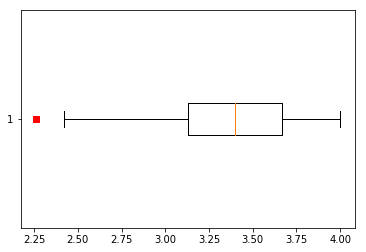

In [55]:

#boxplot 2 GPA
#df_clean.gpa.plot(kind = 'box', figsize = (8, 4))
plt.figure()
plt.boxplot(df_clean.gpa, 0, 'rs', 0)


#### Question 7. What do this plots show?

Answer: 

In general:
The two box plots show you the distribution of the values in these respective columns.
Each box shows you the value range for Q2 and Q3, known as the IQR (Inter-Quartile Range) where 50% of the data points lie in the range.
The line in the middle of the box indicates the median value of the data points.
The lines on etiher side of the main box (called whiskers) show you the Q1 and Q4 quarter value ranges.
The outliers are shown by circles/dots which are still part of the range of the data points.
Outliers may deserve special attention in terms of managing the data for ongoing use/learning etc...
The basic box plot does not tell you the total number of observations.

Specifically observations (verified by my function in the cell below):

* GRE box plot:
    * median  : 580
    * IQR     : 140
    * range   : 580 (220 - 880)
    * outliers: 4 [220, 300, 300, 300] on the lower end, none on the high end
    * shape   : skewed right (slightly)
  

* GPA box plot:
    * median  : 3.4
    * IQR     : 0.54
    * range   : 1.74 (2.26 - 4.0)
    * outliers: 1 [2.26] on the lower end, none on the high end
    * shape   : skewed right (slightly)


In [53]:
#a Verifying observations from box plots...
def describe_column(input_column, min_scale, max_scale):
    
    column_name  = input_column.name
    column_count = input_column.count()

    min_data_point = input_column.min()
    max_data_point = input_column.max()
    range = max_data_point - min_data_point
    
    q1 = input_column.quantile(0.25)
    q2 = input_column.quantile(0.5)
    q3 = input_column.quantile(0.75)
    iqr = q3 - q1
    
    q1_start = max(min_data_point, (q1 - (1.5 * iqr)))
    q4_end   = min((q3 + (1.5 * iqr)), max_data_point)
    
    # separate by sections of the range of data points to use later to get the counts across the span...
    df_low_outliers = input_column[(input_column<q1_start)]
    df_q1 = input_column[(input_column>=q1_start) & (input_column<=q1)]
    df_q2 = input_column[(input_column>q1) & (input_column<=q2)]
    df_q3 = input_column[(input_column>q2) & (input_column<=q3)]
    df_q4 = input_column[(input_column>q3) & (input_column<=q4_end)]
    df_high_outliers = input_column[(input_column>q4_end)]

    median = input_column.median()
    
    skew = input_column.skew()
    if skew < 0.0:
        shape = "skewed right"
    elif skew == 0.0:
        shape = "symmetrical"
    else:
        shape = "skewed left"
        
    print "\nColumn name: %s" % column_name
    print "    Observations : %s\n" % column_count
    
    print "    Scale Start  : %s" % min_scale
    print "    Min          : %s" % min_data_point
    print "    Low outliers : %s   %s" % (df_low_outliers.count(), df_low_outliers.values)
    print "    Q1           : %s - %s [%s]" % (q1_start, (q1-0.001), df_q1.count())
    print "    Q2           : %s - %s [%s]" % (q1, (q2-0.001), df_q2.count())
    print "    Q3           : %s - %s [%s]" % (q2, (q3-0.001), df_q3.count())
    print "    Q4           : %s - %s [%s]" % (q3, q4_end, df_q4.count())
    print "    High outliers: %s   %s" % (df_high_outliers.count(), df_high_outliers.values)
    print "    Max          : %s " % max_data_point
    print "    Scale End    : %s\n" % max_scale
    
    print "    Range        : %s" % range
    print "    Median (Q2)  : %s" % median
    print "    IQR (Q3-Q1)  : %s\n" % iqr

    print "    Shape        : %s (skew = %s)\n" % (shape, skew)

describe_column(df_clean['gre'], 200.0, 800.0)
describe_column(df_clean['gpa'], 0.0, 4.0)


Column name: gre
    Observations : 397

    Scale Start  : 200.0
    Min          : 220.0
    Low outliers : 4   [ 300.  300.  220.  300.]
    Q1           : 310.0 - 519.999 [118]
    Q2           : 520.0 - 579.999 [79]
    Q3           : 580.0 - 659.999 [97]
    Q4           : 660.0 - 800.0 [99]
    High outliers: 0   []
    Max          : 800.0 
    Scale End    : 800.0

    Range        : 580.0
    Median (Q2)  : 580.0
    IQR (Q3-Q1)  : 140.0

    Shape        : skewed right (skew = -0.146046988216)


Column name: gpa
    Observations : 397

    Scale Start  : 0.0
    Min          : 2.26
    Low outliers : 1   [ 2.26]
    Q1           : 2.32 - 3.129 [101]
    Q2           : 3.13 - 3.399 [103]
    Q3           : 3.4 - 3.669 [95]
    Q4           : 3.67 - 4.0 [97]
    High outliers: 0   []
    Max          : 4.0 
    Scale End    : 4.0

    Range        : 1.74
    Median (Q2)  : 3.4
    IQR (Q3-Q1)  : 0.54

    Shape        : skewed right (skew = -0.216888932969)



#### Question 8. Describe each distribution 

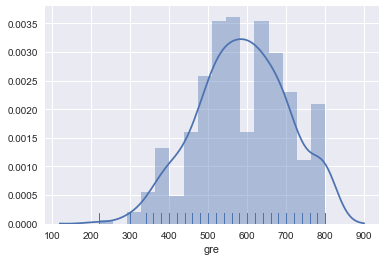

In [70]:
# plot the distribution of each variable 

#histogram plot 1 GRE
#df_clean.gre.plot(kind = 'hist', figsize = (8, 8), bins=60)

sns.distplot(df_clean.gre, rug=True)

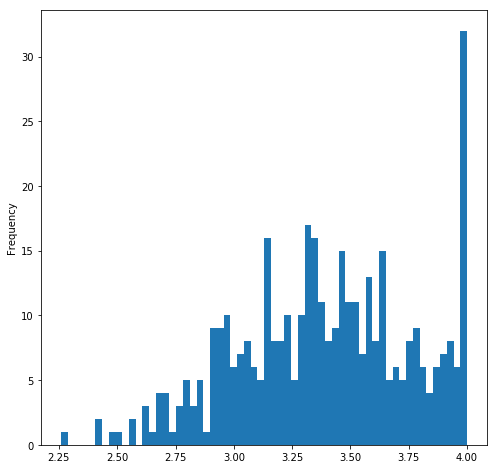

In [63]:
#histogram plot 1 GPA
df_clean.gpa.plot(kind = 'hist', figsize = (8, 8), bins=60)

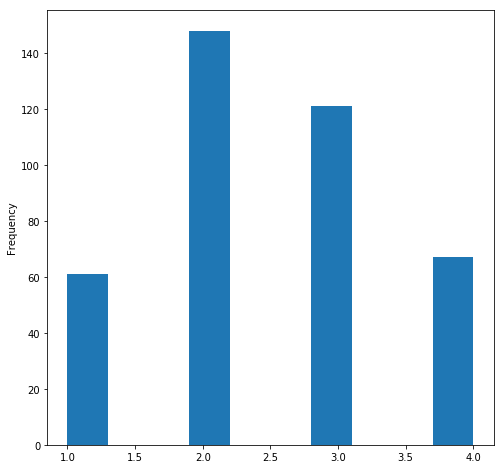

In [64]:
#histogram plot 1 prestige
df_clean.prestige.plot(kind = 'hist', figsize = (8, 8))

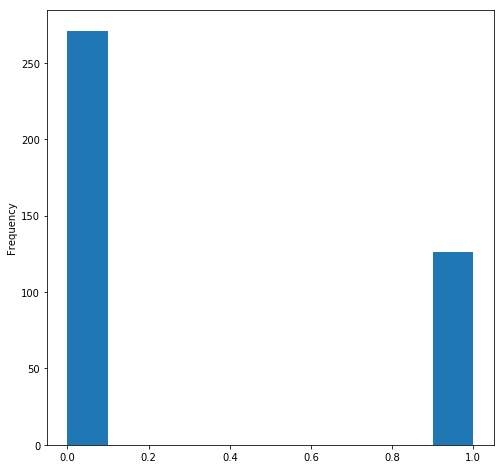

In [65]:
#histogram plot 1 admit
df_clean.admit.plot(kind = 'hist', figsize = (8, 8))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

No - the distribution for the:
    GPA is not normal - there is another spike in the frequency of GPA's near 4.0.
    GRE is not normal - there is a higher frequency of GRE scores near the max.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

We cannot know the reason for larger count of high GPAs and GREs.
We know that there is a low correlation (see below) between GPA and GRE scores in this data set.
It seems that the data itself my be corrupt - for example perhaps some kind of really easy grading took place at those schools leading to a high GPA which perhaps correlates to low school prestige.
In the code samples below we can play around with the gpa values and the prestige of the school and it looks like a dispraportionate amount of high GPAs came from lower prestige schools.


In [ ]:
df_clean[['gpa', 'gre']].corr()

In [ ]:
import seaborn as sns
sns.heatmap(df_clean[['gpa', 'gre']].corr())

In [ ]:
# Play around with different value bounds for gpa and gre below to see when the counts become disproprtionate
# from what would be expected in a normal distribution of data
df_high_gpa = df_clean[(df_clean['gpa']>3.75) & (df_clean['prestige']<3.0)]
df_high_gpa.count()

#### Question 11. Which of our variables are potentially colinear? 

Answer: 

gpa and prestige, since they are on the same scale from 0.0 - 4.0

In [ ]:
# create a correlation matrix for the data
df_clean.corr()


In [ ]:
sns.heatmap(df_clean.corr())

#### Question 12. What did you find?

Answer: 

Aa mentioned before there is a surprisingly low correlation between gpa and gre, but all correlations are low (as illustrated in the heat map) which is surprising. I would have expected a higher correlation between admit and each of the three other variables, and between all the variables.


#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1. Find the frequency counts of those applicants admitted versus rejected by prestige class of school
2. Examine counts for unexpected disparity
3. Plot bar chart of counts for prestige for visual comparison

See code below that implements the above plan

In [ ]:
# Create a new dataframe with only admitted rows
df_admit = df_clean[(df_clean['admit']==1.00)]

# Reduce to only 'prestige' and 'admit' columns
df_prestige_admit = df_admit[['prestige', 'admit']]

# Get the total counts of the admitted students by prestige...
df_prestige_admit_counts = df_prestige_admit['prestige'].value_counts()

#df_prestige_admit_counts


# Create a new dataframe with only rejected rows
df_reject = df_clean[(df_clean['admit']==0.00)]

# Reduce to only 'prestige' and 'admit' columns
df_prestige_reject = df_reject[['prestige', 'admit']]

# Get the total counts of the rejected students by prestige...
df_prestige_reject_counts = df_prestige_reject['prestige'].value_counts()

#df_prestige_reject_counts


# Combine the two data frames
df_combined = pd.concat([df_prestige_admit_counts, df_prestige_reject_counts], axis=1, join_axes=[df_prestige_admit_counts.index])

# Sort the combined data frame in the numerical order of the prestige of the school...
df_combined.sort_index(inplace=True)

# Rename the columns for the output
df_combined.columns = ['admitted', 'rejected']
df_combined.index.names = ['prestige']

# Display the results
df_combined

In [ ]:
# Make a bar plot showing the relative distribution of admited to rejected by prestige of the school
df_combined.plot(kind = "bar")

#### Question 14. What is your hypothesis? 

Answer: 

My hypothesis is that there i

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data